## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [2]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [11]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
clusters = kmeans.labels_       

In [54]:
print(centers)


print(clusters)

[[ 4.77901274e+00 -5.75892942e+00 -3.27303355e+00  1.49413366e+00
   3.54369589e+00 -3.36893022e+00  1.03681891e+01  4.15665756e+00]
 [ 3.52377800e-01 -2.07755473e+00 -3.42434865e+00  6.18483772e+00
  -1.47639379e+00 -9.15946186e+00 -1.70571843e+00  7.72443034e+00]
 [-6.50411634e+00 -6.71858742e+00  7.78675761e-01  7.76806894e-01
   1.35005206e+00  6.90065037e+00  5.85973301e+00  1.32125911e+00]
 [-1.94772706e+00 -2.00888503e+00 -3.90619431e+00  2.85870673e+00
  -2.71717350e+00 -8.95925682e+00 -3.89908198e+00  4.79919646e+00]
 [ 4.65745840e+00 -4.30361900e+00 -6.11816955e+00 -1.03531287e+00
   2.40033833e+00 -1.98599002e+00  8.75677582e+00  4.53653342e+00]
 [ 4.79934184e-01 -2.41638333e+00 -8.54944659e-01  3.86140179e+00
  -3.20668474e+00 -6.23265264e+00 -3.12810968e+00  5.80265099e+00]
 [-5.91544190e+00 -6.86189768e+00  3.26651612e-01  1.07354537e+00
   4.88711010e+00  7.51509123e+00  4.23098721e+00  1.67844890e+00]
 [ 3.04790493e+00 -2.38150123e+00 -6.14373743e+00  7.06571918e-01
   

In [55]:

def total_internal_ss(X,centers, clusters):
    A= centers.shape[0] 
    B= centers.shape[1]
    N_rows = X.shape[0]
    closest_centers = np.zeros((N_rows, B))
    for n in range(A):
        x = clusters == n
        for j in range(B):
            closest_centers[x,j] = centers[n,j]    #  the centroid (closest) to the given observation!
    return np.sum((X-closest_centers)**2)    #nearest neighbors


In [56]:
total_internal_ss(X, centers, clusters)

3114.7743459999942

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

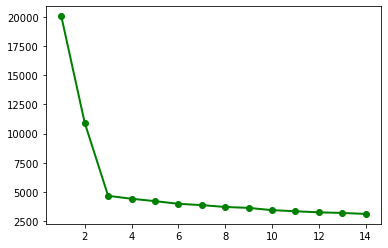

In [57]:
n_cluster = np.array(range(1,15))          # Array that contains the number of clusters.
total_ss = np.array([])                    # Array that will contain the total internal sum of squares.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))
    
    
# to plot    
plt.plot(n_cluster,total_ss,color='green',marker='o',linewidth=2,markersize=6)
plt.show()

From the plot we can observe using the elbow method that the optimal number of clusters is 3
yes it is the same as expected!
